# EM for Gaussian Mixture Models
### CS181
### Spring 2023
![](https://i.imgur.com/xDR9VQd.png)

In [1]:
### Import basic libraries
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Overview 
In this notebook, we given a demonstration of how to derive and implement EM for Gaussian Mixture Models.

## A Model for Birth Weights
Recall our model for birth weigths, $Y_1,\ldots, Y_N$. We *posited* that the birth weights are iid normally distributed with known $\sigma^2$, $Y_n \sim \mathcal{N}(\mu, 1)$. But clearly, one single Gaussian distribution does not model the actual data!

![](https://i.imgur.com/Wb9PDR6.jpg)

### Class Membership as a Latent Variable

We observe that there are three ***clusters*** in the data. We posit that there are three ***classes*** of infants in the study: infants with low birth weights, infants with normal birth weights and those with high birth weights. The numbers of infants in the classes are not equal.

For each observation $Y_n$, we model its class membership $Z_n$ as a categorical variable, 

$$Z_n\sim Cat(\pi),$$

where $\pi_i$ in $\pi = [\pi_1, \pi_2, \pi_3]$ is the class proportion. Note that we don't have the class membership $Z_n$ in the data! So $Z_n$ is called a ***latent variable***.

Depending on the class, the $n$-th birth weight $Y_n$ will have a different normal distribution,

$$
Y_n | Z_n \sim \mathcal{N}\left(\mu_{Z_n}, \sigma^2_{Z_n}\right)
$$

where $\mu_{Z_n}$ is one of the three class means $[\mu_1, \mu_2, \mu_3]$ and $\sigma^2_{Z_n}$ is one of the three class variances $[\sigma^2_1, \sigma^2_2, \sigma^2_3]$.

## The Expectation Maximization Algorithm

Recall from last week, the ***exepectation maximization (EM) algorithm*** maximize the ELBO of the model,
![](https://i.imgur.com/tFOgbdR.jpg)

0. **Initialization:** Pick $\theta_0$, $\phi_0$.
1. Repeat $i=1, \ldots, I$ times:

  **E-Step:** 
$$q_{\text{new}}(Z_n) = \underset{q}{\mathrm{argmax}}\; ELBO(\theta_{\text{old}}, \phi_{\text{old}}, q) = p(Z_n|Y_n, \theta_{\text{old}}, \phi_{\text{old}})$$

  **M-Step:** 
  \begin{aligned}
  \theta_{\text{new}}, \phi_{\text{new}} &= \underset{\theta, \phi}{\mathrm{argmax}}\; ELBO(\theta, \phi, q_{\text{new}})\\
  &= \underset{\theta, \phi}{\mathrm{argmax}}\; \sum_{n=1}^N\mathbb{E}_{Z_n\sim p(Z_n|Y_n, \theta_{\text{old}}, \phi_{\text{old}})}\left[\log \left( p(y_n, Z_n | \phi, \theta\right) \right].
\end{aligned}

## EM for the Gaussian Mixture Model of Birth Weight
The Gaussian mixture model for the birth weight data has 3 Gaussians with meand $\mu = [\mu_1, \mu_2, \mu_3]$ and variances $\sigma^2 = [\sigma_1^2, \sigma_2^2, \sigma_3^2]$, and the model is defined as:
\begin{aligned}
Z_n &\sim Cat(\pi),\\
Y_n | Z_n &\sim \mathcal{N}(\mu_{Z_n}, \sigma^2_{Z_n}),
\end{aligned}
where $n=1, \ldots, N$ and $\sum_{k=1}^3 \pi_k = 1$. 

### The E-Step

The E-step in EM computes the distribution:
$$q_{\text{new}}(Z_n) = \underset{q}{\mathrm{argmax}}\; ELBO(\mu_{i-1}, \sigma^2_{i-1}, \pi_{i_1}, q) = p(Z_n|Y_n, \mu_{\text{old}}, \sigma^2_{\text{old}}, \pi_{\text{old}}).$$ 
Since $Z_n$ is a label, $p(Z_n|Y_n, \ldots)$ is a categorical distribution, with the probability of $Z_n=k$ given by:

$$
p(Z_n = k|Y_n, \mu_{\text{old}}, \sigma^2_{\text{old}}, \pi_{\text{old}}) = \frac{p(y_n|Z_n = k, \mu_{\text{old}}, \sigma^2_{\text{old}})p(Z_n=k | \pi_{\text{old}})}{\sum_{k=1}^K p(y|Z_n = k, \mu_{\text{old}}, \sigma^2_{\text{old}})p(Z_n=k | \pi_{\text{old}})} = \underbrace{\frac{\pi_{k, \text{old}}\,\mathcal{N}(y_n; \mu_{k, \text{old}}, \sigma^2_{k, \text{old}})}{\mathcal{Z}}}_{r_{n, k}},
$$
where $\mathcal{Z} = \sum_{k=1}^K \pi_{k, \text{old}}\,\mathcal{N}(y_n; \mu_{k, \text{old}}, \sigma^2_{k, \text{old}})$.

### Setting Up the M-Step

The M-step in EM maximize the following: 
$$\underset{\mu, \sigma^2, \pi}{\mathrm{argmax}}\; ELBO(\mu, \sigma^2, \pi, q_{\text{new}}) = \underset{\mu, \sigma^2, \pi}{\mathrm{argmax}}\; \sum_{n=1}^N\mathbb{E}_{Z_n\sim p(Z_n|Y_n, \mu_{k, \text{old}}, \sigma^2_{k, \text{old}})}\left[\log \left( p(y_n, Z_n | \mu, \sigma^2, \pi\right) \right].$$

If we expand the expectation a little, we get:
\begin{aligned}
\sum_{n=1}^N\mathbb{E}_{Z_n\sim p(Z_n|Y_n, \mu_{\text{old}}, \sigma^2_{\text{old}}, \pi_{\text{old}})}\left[\log \left(p(y_n, Z_n | \mu, \sigma^2, \pi) \right) \right] &= \sum_{n=1}^N \underbrace{\sum_{n=1}^K \log \left(\underbrace{ p(y_n| Z_n=k, \mu, \sigma^2) p(Z_n=k| \pi)}_{\text{factoring the joint }p(y_n, Z_n| \ldots) } \right) p(Z_n=k|y_n, \theta_{\text{old}}, \phi_{\text{old}})}_{\text{expanding the expectation}}\\
&=\sum_{n=1}^N \sum_{k=1}^K \underbrace{r_{n, k}}_{p(Z_n=k|y_n, \theta_{\text{old}}, \phi_{\text{old}})} \left[\log \underbrace{\mathcal{N}(y_n; \mu_k, \sigma^2_k)}_{p(y_n| Z_n=k, \mu, \sigma^2)}  + \log \underbrace{\pi_k}_{p(Z_n=k| \pi)}\right]\\
&= \underbrace{\sum_{n=1}^N \sum_{k=1}^K r_{n, k} \log \mathcal{N}(y_n; \mu_k, \sigma^2_k)}_{\text{Term #1}} + \underbrace{\sum_{n=1}^N \sum_{k=1}^K r_{n, k}\pi_k}_{\text{Term #2}} 
\end{aligned}
We can maximize each Term #1 and Term #2 individually.

### Solving the M-Step

We see that the optimization problem in the M-step: $\mu_{\text{new}}, \sigma^2_{\text{new}}, \pi_{\text{new}} = \underset{\mu, \sigma^2, \pi}{\mathrm{argmax}}\; ELBO(\mu, \sigma^2, \pi, q_{\text{new}})$ is equivalent to two problems
\begin{aligned}
&1.\quad \underset{\mu, \sigma^2}{\mathrm{argmax}}\; \sum_{n=1}^N \sum_{k=1}^K r_{n, k} \log \mathcal{N}(y_n; \mu_k, \sigma^2_k)\\
&2.\quad \underset{\pi}{\mathrm{argmax}}\; \sum_{n=1}^N \sum_{k=1}^K r_{n, k}\pi_k
\end{aligned}
We can solve each optimization problem analytically by finding stationary points of the gradient (or the Lagrangian):
- $\mu_{\text{new}} = \frac{1}{ \sum_{n=1}^N r_{n, k}} \sum_{n=1}^N r_{n, k} y_n$

- $\sigma^2_{\text{new}} = \frac{1}{ \sum_{n=1}^N r_{n, k}} \sum_{n=1}^N r_{n, k} (y_n - \mu_{\text{new}})^2$

- $\pi_{\text{new}} =  \frac{\sum_{n=1}^N r_{n, k}}{N}$

### All Together

**Initialization:**
Pick any $\pi$, $\mu$, $\sigma^2$

**E-Step:**
Compute $r_{n, k} = \displaystyle\frac{\pi_{k, \text{old}}\,\mathcal{N}(y_n; \mu_{k, \text{old}}, \sigma^2_{k, \text{old}})}{\mathcal{Z}}$, where $\mathcal{Z} = \sum_{k=1}^K \pi_{k, \text{old}}\,\mathcal{N}(y_n; \mu_{k, \text{old}}, \sigma^2_{k, \text{old}})$.

**M-Step:**
Compute model parameters:
- $\mu_{\text{new}} = \frac{1}{ \sum_{n=1}^N r_{n, k}} \sum_{n=1}^N r_{n, k} y_n$

- $\sigma^2_{\text{new}} = \frac{1}{ \sum_{n=1}^N r_{n, k}} \sum_{n=1}^N r_{n, k} (y_n - \mu_{\text{new}})^2$

- $\pi_{\text{new}} =  \frac{\sum_{n=1}^N r_{n, k}}{N}$

## Implementing EM for the Gaussian Mixture Model of Birth Weight

In [2]:
#Generate data
N = 2000
pis = [0.2, 0.6, 0.2]
mus = [4.3, 6, 7.8]
sigmas = [0.5**2, 0.7**2, 0.5**2]
K = 3
zs = np.random.choice(np.arange(K), size=N, p=pis)
y = np.array([np.random.normal(mus[z], sigmas[z]**0.5, 1)[0] for z in zs])

#initialization
mu_init = [2, 4, 5]
sigma_init = [2., 2., 2.]
pi_init = [0.33, 0.33, 0.33]

#implement EM
mu_current = mu_init
sigma_current = sigma_init
pi_current = pi_init

log_lkhd = []

total_iter = 1500
threshold = 1e-10

mu_diff = 1.
pi_diff = 1.
sigma_diff = 1.

i = 0

while i < total_iter and mu_diff > threshold and pi_diff > threshold and sigma_diff > threshold:
    #E-step
    r_unnormalized = np.array([(pi_current[k] *  sp.stats.norm(mu_current[k], sigma_current[k]**0.5).pdf(y)) for k in range(K)]).T
    r = r_unnormalized / r_unnormalized.sum(axis=1).reshape((-1, 1))
    #M-step
    mu_next = np.array([1. / r[:, k].sum() * (r[:, k] * y).sum() for k in range(K)])
    sigma_next = np.array([1. / r[:, k].sum() * (r[:, k] * (y - mu_next[k])**2).sum() for k in range(K)])
    pi_next = r.sum(axis=0) / r.shape[0]
    
    #compute log observed likelihood
    if i % 100 == 0:
        print('iteration ', i)
        ll = 0
        for n in range(len(y)):
            ll += np.log(np.sum([sp.stats.norm(mu_next[k], sigma_next[k]**0.5).pdf(y[n]) * pi_next[k] for k in range(K)])) 
        log_lkhd.append(ll)
        
    #convergence check
    mu_diff = np.linalg.norm(mu_next - mu_current)
    pi_diff = np.linalg.norm(pi_next - pi_current)
    sigma_diff = np.linalg.norm(sigma_next - sigma_current)
           
    #update parameters
    mu_current = mu_next
    sigma_current = sigma_next
    pi_current = pi_next
    i += 1
    
x = np.linspace(y.min(), y.max(), 100)

iteration  0
iteration  100
iteration  200
iteration  300
iteration  400
iteration  500
iteration  600
iteration  700
iteration  800
iteration  900
iteration  1000


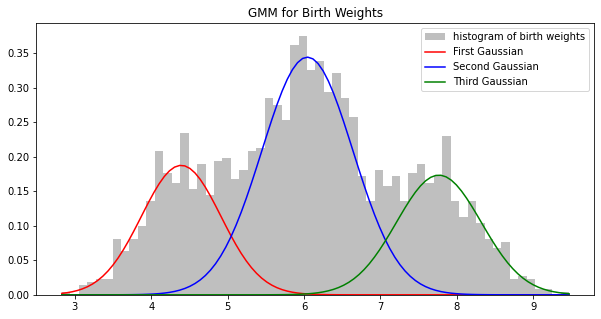

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(y, bins=60, density=True, color='gray', alpha=0.5, label='histogram of birth weights')
ax.plot(x, pi_current[0] * sp.stats.norm(mu_current[0], sigma_current[0]**0.5).pdf(x), color='red', label='First Gaussian')
ax.plot(x, pi_current[1] * sp.stats.norm(mu_current[1], sigma_current[1]**0.5).pdf(x), color='blue', label='Second Gaussian')
ax.plot(x, pi_current[2] * sp.stats.norm(mu_current[2], sigma_current[2]**0.5).pdf(x), color='green', label='Third Gaussian')
ax.set_title('GMM for Birth Weights')
ax.legend(loc='best')
plt.show()

## Sanity Check: Log-Likelihood During Training

Remember that ploting the MLE model against actual data is not always an option (e.g. high-dimensional data).

A sanity check for that your EM algorithm has been implemented correctly is to plot the observed data log-likelihood over the iterations of the algorithm:
$$
\ell_y(\mu, \sigma^2, \pi) = \sum_{n=1}^N \log \sum_{k=1}^K \mathcal{N}(y_n; \mu_k, \sigma_k^2) \pi_k
$$

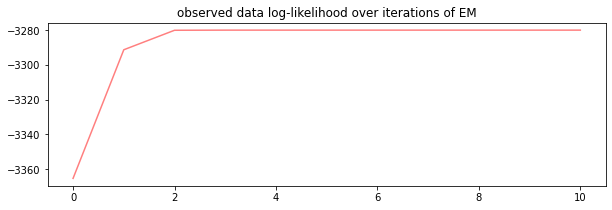

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(range(len(log_lkhd)), log_lkhd, color='red', alpha=0.5)
ax.set_title('observed data log-likelihood over iterations of EM')
plt.show()